# Assignment07
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment07

# Import packages for plotting graphs and manipulating data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set variables and visualize data:

## Set variables
Make data y1 as $y1 = |x|\cdot\sin\left(x\right)$, and make y2 as noisy data with $\sigma=5$.

In [2]:
num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
    #f = np.sin(x) * (1 / (1 + np.exp(-x))) 
    f = np.abs(x) * np.sin(x)
    return f

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-10,10,num)
y1 = fun(x)
y2 = y1 + nn * std

## Show clean data and noisy data

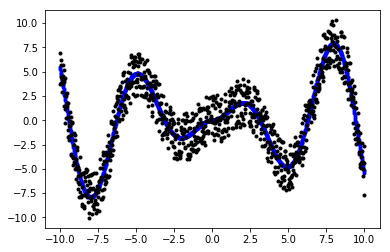

In [3]:
plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# Define functions to solve Least-square problem :

## Define Matrix A

$$
A = \begin{bmatrix}
1 & x_1 &\cdots &x_1^{p-1}\\
1 & x_2  &\cdots &x_2^{p-1}\\
\vdots & \vdots&&\vdots \\
1 & x_n &\cdots&x_n^{p-1}
\end{bmatrix}$$

for $p=1,\cdots,10$

And then we will find $$ \begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_p \end{bmatrix}$$ that minimizes $$\begin{Vmatrix}\begin{bmatrix}1 & x_1 &\cdots &x_1^{p-1} \\1 & x_2 &\cdots &x_2^{p-1} \\\vdots & \vdots &&\vdots \\1 & x_n &\cdots&x_n^{p-1}\end{bmatrix}\cdot\begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_p \end{bmatrix} - \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}\end{Vmatrix}$$.

In [4]:
def makeA(x, p):
    A = np.array([[x1**pi for pi in range(p)] for x1 in x])
    return A

## Define norm function
This function returns norm of a vector.

In [5]:
def norm(vector):
    sum = 0
    for i in range(len(vector)):
        sum += vector[i]**2
    return np.sqrt(sum)

## Define proj function
This function returns projection of vectors.

In [6]:
def proj(e, a):
    return (np.matmul(e.T, a) / np.matmul(e.T, e))*e

## Define computeQR function
This function returns the Q, R matrix from input matrix. Q is the orthonormal matrix, and R is upper triangle matrix.

In [7]:
def computeQR(matrix):
    Q = np.zeros([matrix.shape[0], matrix.shape[1]])
    R = np.zeros([matrix.shape[1], matrix.shape[1]])
    U = np.zeros([matrix.shape[1], matrix.shape[0]])
    
    for i in range(matrix.shape[1]):
        sum = 0
        Ai = A[:,i]
        for j in range(i):
            sum += proj(U[j], Ai)
        U[i] = Ai - sum
        
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            Q[j][i] = U[i][j]/norm(U[i])
            
    for i in range(matrix.shape[0]):
        for j in range(i, matrix.shape[1]):
            R[i][j] = np.dot(Q[:,i], matrix[:,j])
    return Q, R

## Define findX function
This function returns x, from Q, R, and b. Q, R is from computeQR function, that makes A by multiplication. So this function can find x that satisfy least-square problem such that $A\cdot x = Q\cdot R\cdot x = b$.

In [8]:
def findX(Q, R, b):
    Rsol = np.matmul(Q.T, b)
    sol = np.zeros(Rsol.shape)
    for i in reversed(range(Rsol.shape[0])):
        a = Rsol[i]
        for j in reversed(range(i+1, Rsol.shape[0])):
            a -= sol[j]*R[i][j]
        sol[i] = a / R[i][i]
    return sol

## Define myfunc function
This function returns the result of my polynomial.

In [9]:
def myfunc(sols, x):
    f = 0
    for i, sol in enumerate(sols):
        f += sol * (x**i)
    return f

## Define calLoss function
This function calculates loss.

In [10]:
def calLoss(f, real):
    if f.shape != real.shape: 
        return np.inf
    sum = 0
    for (y1, y2) in zip(f, real):
        sum += (y1 - y2)**2
    return sum

# For $p = 1, \cdots, 10$, calculate polynomials and Loss :

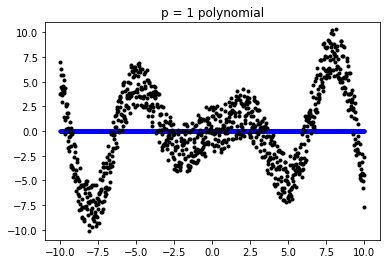

Loss : 16496.98219003477


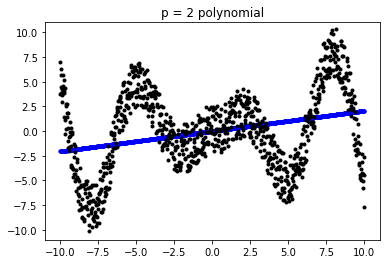

Loss : 15139.62897731164


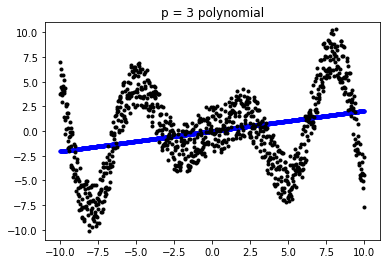

Loss : 15139.62897731164


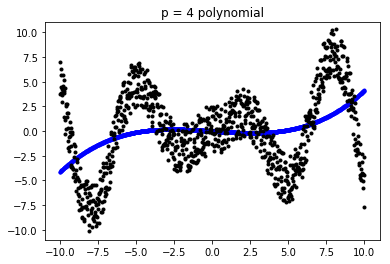

Loss : 14521.049094796785


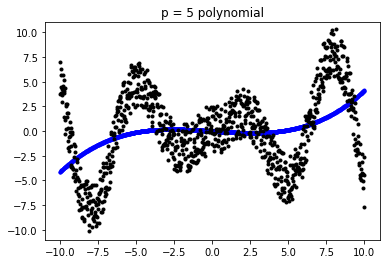

Loss : 14521.049094796783


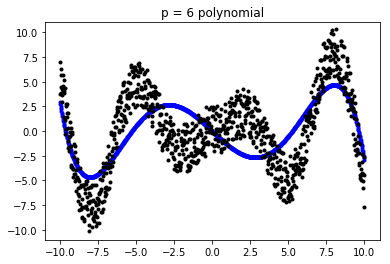

Loss : 9987.026339109863


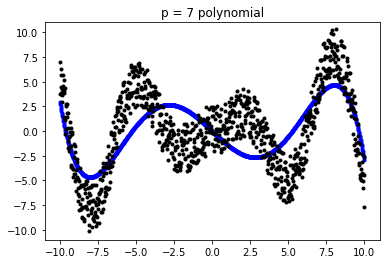

Loss : 9987.02633910987


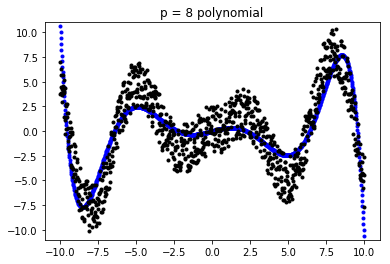

Loss : 4785.013772329048


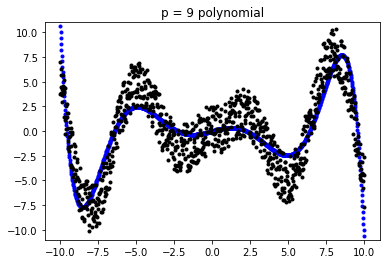

Loss : 4785.013772329078


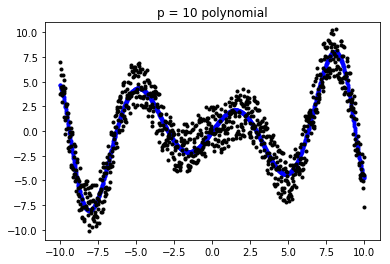

Loss : 2314.998027388784


In [11]:
for i in range(1, 11):
    A = makeA(x, i)
    Q, R = computeQR(A)
    sol = findX(Q, R, y1)
    f = myfunc(sol, x)
    
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.plot(x, f, 'b.', x, y2, 'k.')
    plt.title("p = "+str(i)+" polynomial")
    plt.show()
    
    print("Loss : "+str(calLoss(f, y2)))